In [228]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [229]:
df=pd.read_csv("/Users/samarthgarg/Downloads/ML ETP/DataSets/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [231]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [232]:
X = StandardScaler().fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

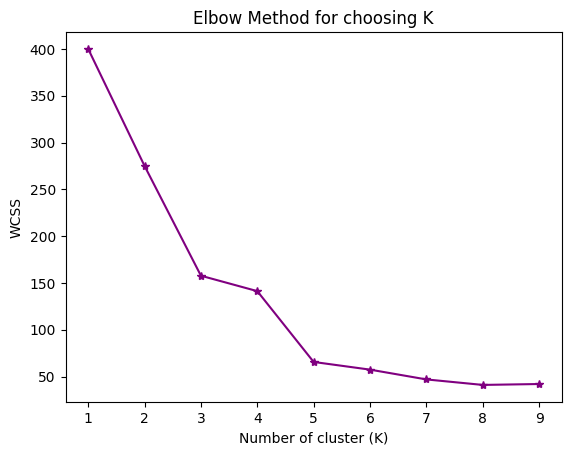

In [233]:
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,10),wcss, marker='*', color='purple')

plt.xlabel("Number of cluster (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for choosing K")
plt.show()

In [ ]:
K = 5   # 🔁 SET K AFTER ELBOW METHOD

km = KMeans(
    n_clusters=K,
    random_state=42
)

km.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [235]:
labels = km.labels_              # Cluster assignment
centroids = km.cluster_centers_  # Final centroids

print("Cluster Labels:\n", labels)
print("Centroids:\n", centroids)


Cluster Labels:
 [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Centroids:
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [236]:
silhouette_score(X, labels)

0.5546571631111091

In [237]:
df["Cluster"] = labels

Text(0, 0.5, 'Feature 2')

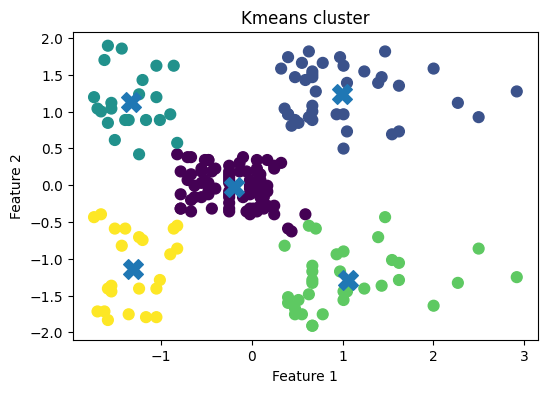

In [238]:
# Plotting

plt.figure(figsize=(6,4))
plt.scatter(X[:,-2],X[:,-1],c=labels,s=60)
plt.scatter(
    km.cluster_centers_[:, -2],
    km.cluster_centers_[:, -1],
    marker='X',
    s=200
)
plt.title("Kmeans cluster")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")